# My first Machine Learning Project

This dataset comprises health records from 200 patients, including measurements of blood pressure, cholesterol levels, and the sodium-to-potassium (Na/K) ratio (a urinary marker associated with cardiovascular risk). Additionally, the dataset includes information on the medication the patient responded well to in the course of his/her treatment (the drug of choice for each patient).

All patients in this dataset were diagnosed with the same condition and responded to one of five medications: Drug A, Drug B, Drug C, Drug X, or Drug Y. This is a highly simplified representation of reality, but for the purpose of this project, we assume that each patient tolerated one specific drug well and that it led to the desired outcome (reduced cardiovascular risk).

The objective of this project is to develop and compare machine learning models that can assisst healthcare providers in choosing the most appropriate medication for a patient based on his/her blood pressure, cholesterol level and Na/K ratio as well as age and sex. 


## 1. Loading data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.linear_model import LinearRegression

df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
df.shape

(200, 6)

## 2. Understanding the dataset & data preparation 

In [8]:
df = df.rename(columns= {'BP':'Blood_pressure'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             200 non-null    int64  
 1   Sex             200 non-null    object 
 2   Blood_pressure  200 non-null    object 
 3   Cholesterol     200 non-null    object 
 4   Na_to_K         200 non-null    float64
 5   Drug            200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [10]:
print(df.isna().sum())

Age               0
Sex               0
Blood_pressure    0
Cholesterol       0
Na_to_K           0
Drug              0
dtype: int64


In [12]:
df.drop_duplicates
df.shape

(200, 6)

The dataset contains 6 columns and 200 rows of data. There are no missing values nor duplicates.

In [14]:
df['Sex'].value_counts()

Sex
M    104
F     96
Name: count, dtype: int64

In [16]:
df['is_female'] = df['Sex'].apply(lambda x: 1 if x == 'F' else 0)
df['is_male'] = df['Sex'].apply(lambda x: 1 if x == 'M' else 0)

In [18]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [20]:
df['high_chol'] = df['Cholesterol'].apply(lambda x: 1 if x == 'HIGH' else 0)
df['nor_chol'] = df['Cholesterol'].apply(lambda x: 1 if x == 'NORMAL' else 0)


In [22]:
df['Blood_pressure'].value_counts()

Blood_pressure
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [24]:
df['high_bp'] = df['Blood_pressure'].apply(lambda x: 1 if x == 'HIGH' else 0)
df['nor_bp'] = df['Blood_pressure'].apply(lambda x: 1 if x == 'NORMAL' else 0)
df['low_bp'] = df['Blood_pressure'].apply(lambda x: 1 if x == 'LOW' else 0)

In [26]:
df.head()

,Age,Sex,Blood_pressure,Cholesterol,Na_to_K,Drug,is_female,is_male,high_chol,nor_chol,high_bp,nor_bp,low_bp
0,23,F,HIGH,HIGH,25.355,DrugY,1,0,1,0,1,0,0
1,47,M,LOW,HIGH,13.093,drugC,0,1,1,0,0,0,1
2,47,M,LOW,HIGH,10.114,drugC,0,1,1,0,0,0,1
3,28,F,NORMAL,HIGH,7.798,drugX,1,0,1,0,0,1,0
4,61,F,LOW,HIGH,18.043,DrugY,1,0,1,0,0,0,1


## 3. Exploring the data

### Grouping data

We will group the 'Age' and 'Na_to_K' values depending on the max and min values in each column. Let's have a look at their distributions.

Text(0.5, 1.0, 'Age distribution')

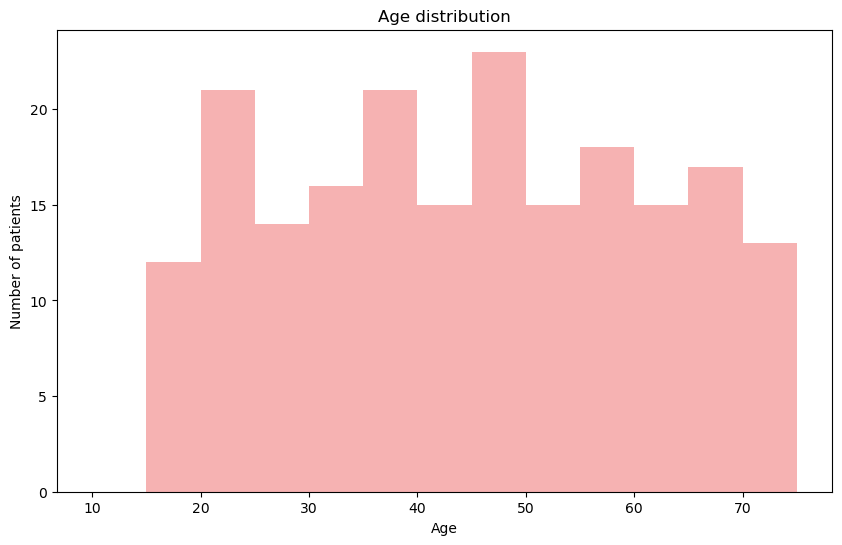

In [34]:
plt.figure(figsize=(10,6))
 
x = plt.hist(df['Age'],bins=range(10,80,5), alpha=0.6, color = 'lightcoral')
plt.ylabel('Number of patients')
plt.xlabel('Age')
plt.title('Age distribution')


In [36]:
df['Age'].describe()

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64

In [38]:
df['Age_groups'] = df['Age'].apply(lambda x:
                                   '10-20' if x in range(10,21) else
                                   '21-30' if x in range(21,31) else
                                   '31-40' if x in range(31,41) else
                                   '41-50' if x in range(41,51) else
                                   '51-60' if x in range(51,61) else
                                   '61-70' if x in range(61,71) else
                                   '71+')


In [40]:
df.head()

,Age,Sex,Blood_pressure,Cholesterol,Na_to_K,Drug,is_female,is_male,high_chol,nor_chol,high_bp,nor_bp,low_bp,Age_groups
0,23,F,HIGH,HIGH,25.355,DrugY,1,0,1,0,1,0,0,21-30
1,47,M,LOW,HIGH,13.093,drugC,0,1,1,0,0,0,1,41-50
2,47,M,LOW,HIGH,10.114,drugC,0,1,1,0,0,0,1,41-50
3,28,F,NORMAL,HIGH,7.798,drugX,1,0,1,0,0,1,0,21-30
4,61,F,LOW,HIGH,18.043,DrugY,1,0,1,0,0,0,1,61-70


Text(0.5, 1.0, 'Na/K ratio distribution')

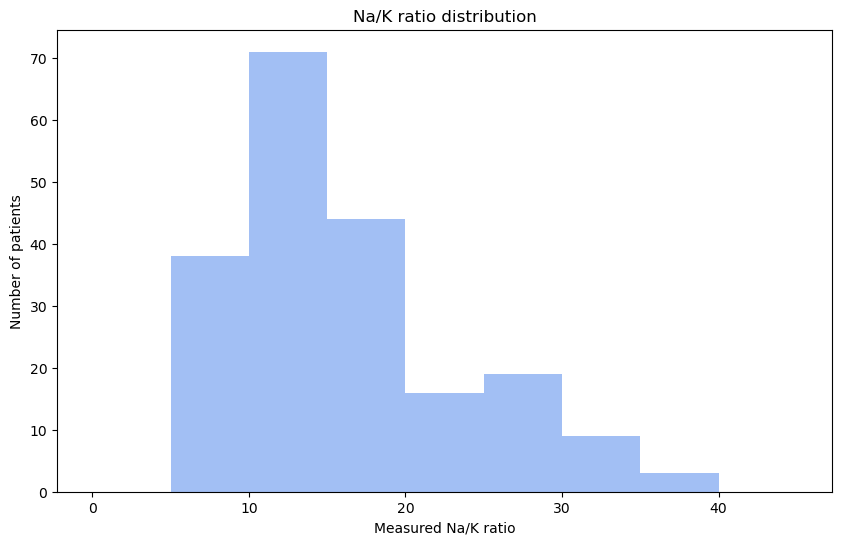

In [42]:
plt.figure(figsize=(10,6))
 
x = plt.hist(df['Na_to_K'],bins=range(0,50,5), alpha=0.6, color = 'cornflowerblue')
plt.ylabel('Number of patients')
plt.xlabel('Measured Na/K ratio')
plt.title('Na/K ratio distribution')

In [44]:
df['Na_to_K'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

In [46]:
df['NAK_groups'] = df['Na_to_K'].apply(lambda x:
                                   '0-10' if x <= 10 else
                                   '11-15' if x  <= 15 else
                                   '16-20' if x  <= 20 else
                                   '21-25' if x  <= 25 else
                                   '26-30' if x  <= 30 else
                                   '31-35' if x  <= 35 else
                                   '36+')

In [48]:
print(df['NAK_groups'].value_counts())
print(df['Age_groups'].value_counts())

NAK_groups
11-15    71
16-20    44
0-10     38
26-30    19
21-25    16
31-35     9
36+       3
Name: count, dtype: int64
Age_groups
41-50    40
31-40    39
51-60    33
21-30    32
61-70    30
10-20    16
71+      10
Name: count, dtype: int64


### Visualising the variable distributions

In [50]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

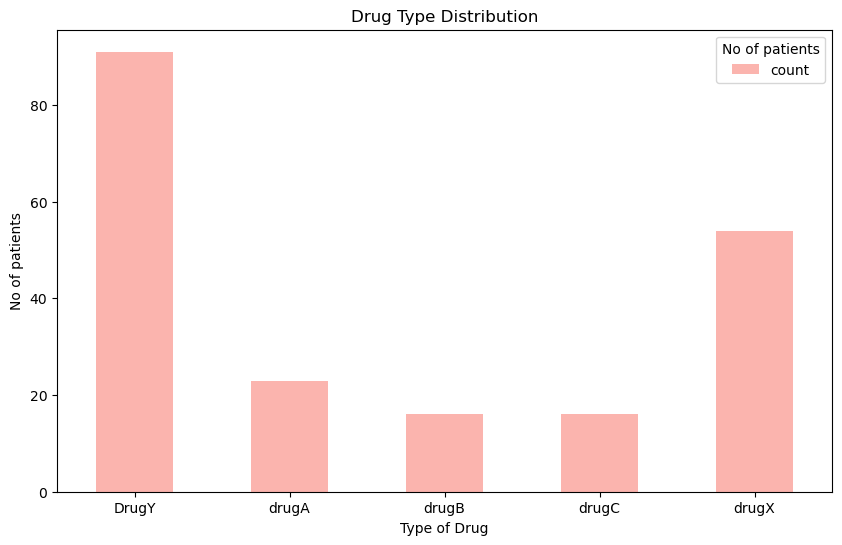

In [52]:
drug_chart = df['Drug'].value_counts().sort_index()
drug_chart.plot(kind='bar', figsize=(10, 6), colormap='Pastel1')
drug_names = sorted(df['Drug'].unique())

plt.title('Drug Type Distribution')
plt.xlabel('Type of Drug')
plt.ylabel('No of patients')
plt.legend(title='No of patients')
plt.xticks(ticks=range(len(drug_names)), labels=drug_names, rotation=0)
plt.show()

# DrugY has been used more often than the other drug types. The dataset is therefore imbalanced. 
# This issue will have to be addressed when building the model. 


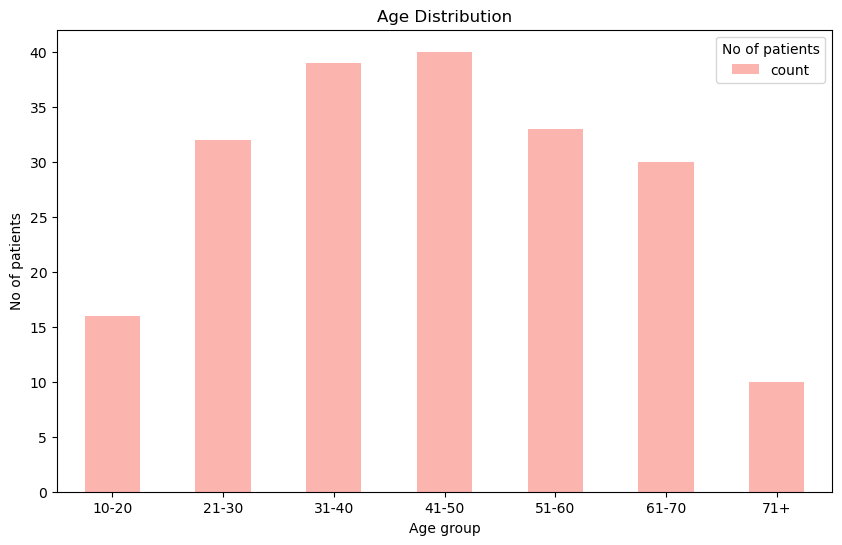

In [31]:
age_chart = df['Age_groups'].value_counts().sort_index()
age_chart.plot(kind='bar', figsize=(10, 6), colormap='Pastel1')
groups = sorted(df['Age_groups'].unique())

plt.title('Age Distribution')
plt.xlabel('Age group')
plt.ylabel('No of patients')
plt.legend(title='No of patients')
plt.xticks(ticks=range(len(groups)), labels=groups, rotation=0)
plt.show()

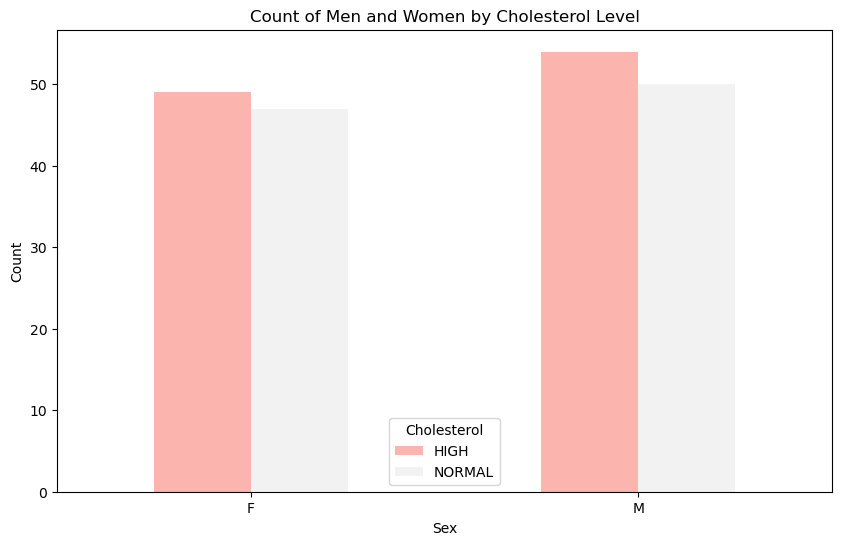

In [54]:
chol_chart = df.groupby(['Sex','Cholesterol']).size().unstack()
chol_chart.plot(kind='bar', figsize=(10, 6), colormap='Pastel1')

plt.title('Count of Men and Women by Cholesterol Level')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Cholesterol')
plt.xticks(rotation=0)  
plt.show()


In [33]:
df.groupby('Sex')['Blood_pressure'].value_counts()

Sex  Blood_pressure
F    HIGH              38
     NORMAL            30
     LOW               28
M    HIGH              39
     LOW               36
     NORMAL            29
Name: count, dtype: int64

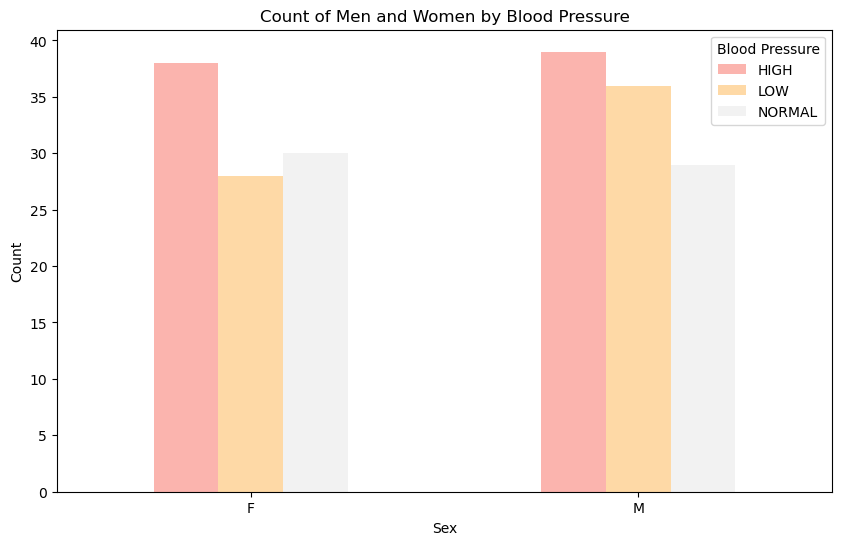

In [56]:
bp_chart = df.groupby(['Sex', 'Blood_pressure']).size().unstack()
bp_chart.plot(kind='bar', figsize=(10, 6), colormap='Pastel1')

plt.title('Count of Men and Women by Blood Pressure')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Blood Pressure')
plt.xticks(rotation=0)  
plt.show()


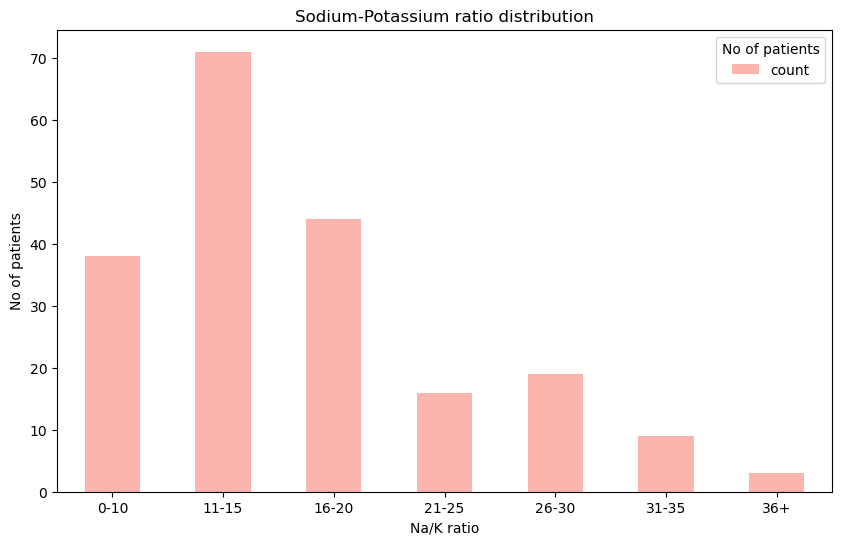

In [58]:
NAK_chart = df['NAK_groups'].value_counts().sort_index()
NAK_chart.plot(kind='bar', figsize=(10, 6), colormap='Pastel1')
groups = sorted(df['NAK_groups'].unique())

plt.title('Sodium-Potassium ratio distribution')
plt.xlabel('Na/K ratio')
plt.ylabel('No of patients')
plt.legend(title='No of patients')
plt.xticks(ticks=range(len(groups)), labels=groups, rotation=0)
plt.show()

In [36]:
df.groupby('Sex')['Na_to_K'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,96.0,17.022063,7.351667,6.683,11.31000,14.4405,21.45125,38.247
M,104.0,15.219029,7.028492,6.269,9.98625,13.3455,18.39700,35.639


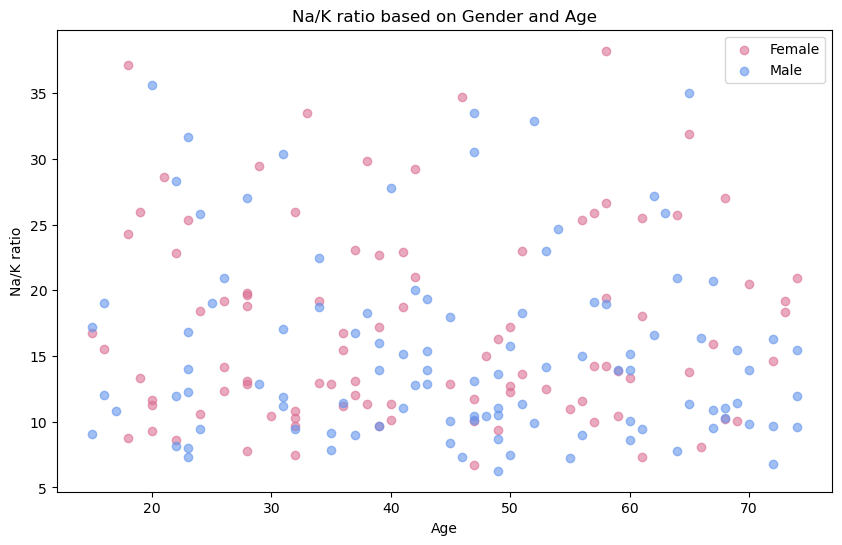

In [37]:
plt.figure(figsize=(10,6))

df_F = df[df['Sex'] == 'F']
df_M = df[df['Sex'] == 'M']

 
plt.scatter(x=df_F['Age'], y=df_F['Na_to_K'], alpha=0.6, color = 'palevioletred', label = 'Female')
plt.scatter(x=df_M['Age'], y=df_M['Na_to_K'], alpha=0.6, color = 'cornflowerblue', label = 'Male')

plt.ylabel('Na/K ratio')
plt.xlabel('Age')
plt.title('Na/K ratio based on Gender and Age') 
plt.legend()



Text(0.5, 1.0, 'Age - Na/K ratio')

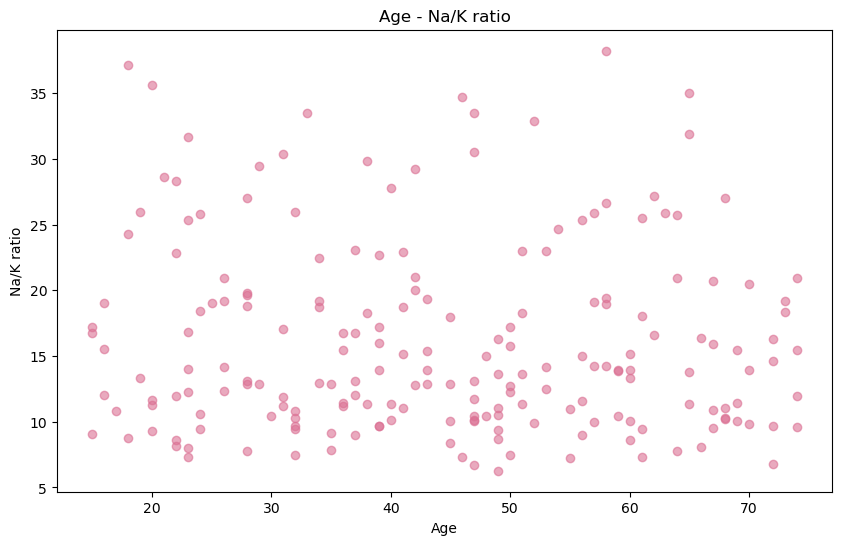

In [38]:
plt.figure(figsize=(10,6))
 
plt.scatter(x=df['Age'], y=df['Na_to_K'], alpha=0.6, color = 'palevioletred')
plt.ylabel('Na/K ratio')
plt.xlabel('Age')
plt.title('Age - Na/K ratio') 

# Apparently Na/K not function of age

## 4. Building the models


### Dataset separation as X and y

In [28]:
df.head()

,Age,Sex,Blood_pressure,Cholesterol,Na_to_K,Drug,is_female,is_male,high_chol,nor_chol,high_bp,nor_bp,low_bp
0,23,F,HIGH,HIGH,25.355,DrugY,1,0,1,0,1,0,0
1,47,M,LOW,HIGH,13.093,drugC,0,1,1,0,0,0,1
2,47,M,LOW,HIGH,10.114,drugC,0,1,1,0,0,0,1
3,28,F,NORMAL,HIGH,7.798,drugX,1,0,1,0,0,1,0
4,61,F,LOW,HIGH,18.043,DrugY,1,0,1,0,0,0,1


In [60]:
X = df.drop(['Sex','Blood_pressure', 'Cholesterol', 'NAK_groups', 'Drug', 'Age_groups'], axis=1)

In [62]:
y = df['Drug']

In [64]:
X

,Age,Na_to_K,is_female,is_male,high_chol,nor_chol,high_bp,nor_bp,low_bp
0,23,25.355,1,0,1,0,1,0,0
1,47,13.093,0,1,1,0,0,0,1
2,47,10.114,0,1,1,0,0,0,1
3,28,7.798,1,0,1,0,0,1,0
4,61,18.043,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...
195,56,11.567,1,0,1,0,0,0,1
196,16,12.006,0,1,1,0,0,0,1
197,52,9.894,0,1,1,0,0,1,0
198,23,14.020,0,1,0,1,0,1,0


In [66]:
y

0      DrugY
1      drugC
2      drugC
3      drugX
4      DrugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

### Splitting the dataset into training and testing set

The dataset is not balanced as 'DrugY' occurs more often than other drug types. Therefore we will use SMOTE (Synthetic Minority Oversampling Technique). SMOTE will oversample drugA, drugB, drugC and drugX to have the same number of samples as DrugY. The synthetic aspect of this oversampling technique helps to avoid overfitting, as it's not just repeating existing data. 

In [107]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100, stratify=y)

X_train = pd.get_dummies(pd.DataFrame(X_train))
X_test = pd.get_dummies(pd.DataFrame(X_test))

# Returned error - Filling missing features with 0
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)  

# Apply SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

#Check the y_train set
y_train.value_counts()


Drug
drugC    73
DrugY    73
drugA    73
drugB    73
drugX    73
Name: count, dtype: int64

In [109]:
# Find highly correlated features (approx. > 0.8/ < -0.8)
df_corr = df[['Age', 'Na_to_K', 'is_female', 'high_chol', 'high_bp']]
df_corr =  df_corr.astype(float)

correlation_matrix = df_corr.corr()
print(correlation_matrix)

                Age   Na_to_K  is_female  high_chol   high_bp
Age        1.000000 -0.063119  -0.102027   0.068234 -0.099782
Na_to_K   -0.063119  1.000000   0.125008  -0.010000  0.104985
is_female -0.102027  0.125008   1.000000  -0.008811  0.021390
high_chol  0.068234 -0.010000  -0.008811   1.000000 -0.095708
high_bp   -0.099782  0.104985   0.021390  -0.095708  1.000000


### **Logistic Regression**

In [111]:
from sklearn.linear_model import LogisticRegression

# Training the model: 
LR_model = LogisticRegression(solver='liblinear', C=0.1, max_iter=200)

# solver = liblinear since it's good for small datasets
# c = 0.1 to prevent overfitting

In [119]:
# Cross-validation - getting a reliable estimate of accuracy

from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(LR_model, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-Validation Accuracy: {:.2f}%".format(cv_scores.mean()*100))


Cross-Validation Accuracy: 87.12%


In [121]:
# Applying the model to make a prediction:

LR_model.fit(X_train, y_train)
LR_predictions = LR_model.predict(X_test)

print(classification_report(y_test, LR_predictions))
print(confusion_matrix(y_test, LR_predictions))

              precision    recall  f1-score   support

       DrugY       0.86      1.00      0.92        18
       drugA       0.80      0.80      0.80         5
       drugB       0.67      0.67      0.67         3
       drugC       1.00      0.67      0.80         3
       drugX       1.00      0.82      0.90        11

    accuracy                           0.88        40
   macro avg       0.86      0.79      0.82        40
weighted avg       0.89      0.88      0.87        40

[[18  0  0  0  0]
 [ 0  4  1  0  0]
 [ 0  1  2  0  0]
 [ 1  0  0  2  0]
 [ 2  0  0  0  9]]


In [123]:
# Evaluating the model

LR_score = accuracy_score(LR_predictions,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_score*100))  

Logistic Regression accuracy is: 87.50%


### **Decision Tree**

In [127]:
# Training the model: 
DT_model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)

In [141]:
# Cross-validation

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(DT_model, X_train, y_train, cv=5, scoring="accuracy")
print("Cross-Validation Accuracy: {:.2f}% ".format(cv_scores.mean()*100))


Cross-Validation Accuracy: 99.73% 


In [135]:
# Applying the model to make a prediction:
DT_model.fit(X_train,y_train)
DT_predictions = DT_model.predict(X_test)

print(classification_report(y_test, DT_predictions))
print(confusion_matrix(y_test, DT_predictions))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        18
       drugA       0.83      1.00      0.91         5
       drugB       1.00      0.67      0.80         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      1.00      1.00        11

    accuracy                           0.97        40
   macro avg       0.97      0.93      0.94        40
weighted avg       0.98      0.97      0.97        40

[[18  0  0  0  0]
 [ 0  5  0  0  0]
 [ 0  1  2  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 11]]


In [137]:
# Evaluating the model
DT_score = accuracy_score(y_test, DT_predictions)
print('Decision Tree accuracy is: {:.2f}%'.format(DT_score*100))


Decision Tree accuracy is: 97.50%


In [139]:
# The accuracy seems a bit too high - the model might be overfitting

print("Train Accuracy:", DT_model.score(X_train, y_train))
print("Test Accuracy:", DT_model.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy: 0.975


In [157]:
# Change params of the decision tree model to reduce overfitting. 
# Decision Trees work well with categories -> binning one of the variables to try improving its performance. 
# Trying to use subgroups/bin of one variable at a time to avoid creating unnecessary amount of dummy variables and overcomplicating the tree.

X_DT = df.drop(['Sex','Blood_pressure', 'Cholesterol', 'Na_to_K', 'Drug', 'Age_groups'], axis=1)
y_DT = df['Drug']
X_DT_train, X_DT_test, y_DT_train, y_DT_test = train_test_split(X_DT, y_DT, test_size = 0.2, random_state = 100, stratify=y)

X_DT_train = pd.get_dummies(pd.DataFrame(X_DT_train))
X_DT_test = pd.get_dummies(pd.DataFrame(X_DT_test))

X_DT_test = X_DT_test.reindex(columns=X_DT_train.columns, fill_value=0)  

X_DT_train, y_DT_train = SMOTE().fit_resample(X_DT_train, y_DT_train)

DT_model = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, random_state=42)


In [159]:
# Cross-validation 

from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(DT_model, X_DT_train, y_DT_train, cv=5, scoring="accuracy")
print("Cross-Validation Accuracy: {:.2f}% ".format(cv_scores.mean()*100))


Cross-Validation Accuracy: 94.25% 


In [161]:
DT_model.fit(X_DT_train,y_DT_train)
DT_predictions = DT_model.predict(X_DT_test)
DT_score = accuracy_score(y_DT_test, DT_predictions)
print('New Decision Tree accuracy is: {:.2f}%'.format(DT_score*100))
print("Train Accuracy: {:.2f}%".format(DT_model.score(X_DT_train, y_DT_train)*100))
print("Test Accuracy: {:.2f}%".format(DT_model.score(X_DT_test, y_DT_test)*100))


New Decision Tree accuracy is: 85.00%
Train Accuracy: 98.90%
Test Accuracy: 85.00%


In [163]:
tree.export_graphviz(DT_model, out_file='drug_selector.dot', 
                    feature_names = sorted(X_DT_train.columns),
                    class_names = sorted(y_DT.unique()),
                    label = 'all',
                    rounded= True,
                    filled=True)

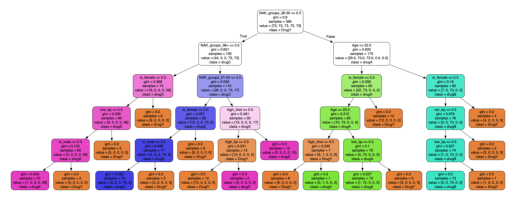

In [165]:
img = mpimg.imread('graphviz.png')
imgplot = plt.imshow(img)
plt.axis('off') 
plt.show()
